In [184]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import Callback
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

tf.__version__


'2.10.0'

In [185]:
(train_data, train_labels),(test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [186]:
train_data[10].shape

(28, 28)

In [187]:
train_labels[11]

5

In [188]:
train_data = train_data /255
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data /255
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)


In [189]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [190]:
def one_hot_label(image, label):
    label = tf.one_hot(label, depth=10)
    return image, label

In [191]:
batch_size = 64
max_epochs = 10

N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size = batch_size)
print(train_dataset)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size = batch_size)
print(test_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


label = 9


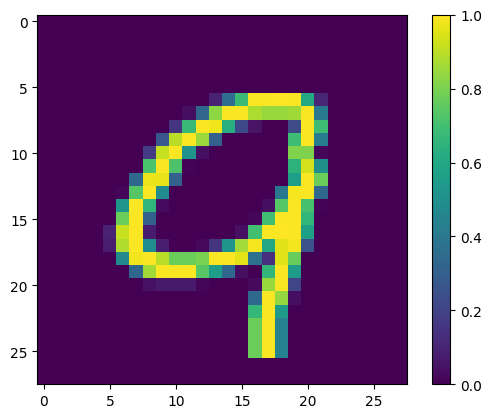

In [192]:
index = 3000
print("label = {}".format( train_labels[index]))
plt.imshow(train_data[index])
plt.colorbar()
plt.show()

In [193]:
model = keras.Sequential([

    keras.layers.Reshape(input_shape=(28, 28), target_shape=(28, 28, 1)),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3),  activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
  
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])

In [194]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              #모델 아웃풋이 logiist인 상태 자체적으로 로짓과 액티베이션을 분리해서 다양한 액티베이션으로 분석함

              metrics=['accuracy'])

In [195]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.095511   0.10755794 0.10028487 0.12401986 0.08106931 0.0945377
  0.11276215 0.09105456 0.09850615 0.09469657]]


In [196]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_14 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_39 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 3, 3, 64)        

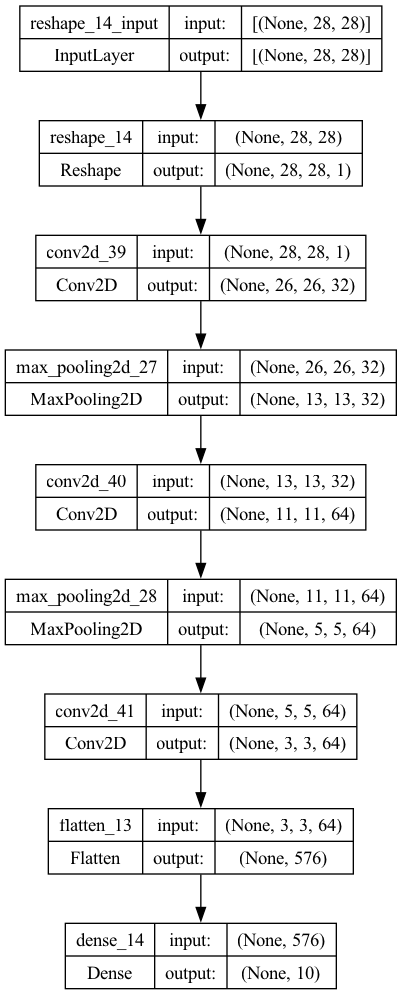

In [197]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [198]:
history = model.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_data) // batch_size)

Epoch 1/10


/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/keras/backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-12-22 16:29:50.226922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


937/937 [==============================] - 18s 19ms/step - loss: 0.6206 - accuracy: 0.8410
Epoch 2/10
937/937 [==============================] - 19s 20ms/step - loss: 0.1712 - accuracy: 0.9503
Epoch 3/10
937/937 [==============================] - 18s 19ms/step - loss: 0.1192 - accuracy: 0.9651
Epoch 4/10
937/937 [==============================] - 18s 19ms/step - loss: 0.0955 - accuracy: 0.9715
Epoch 5/10
937/937 [==============================] - 19s 20ms/step - loss: 0.0811 - accuracy: 0.9755
Epoch 6/10
937/937 [==============================] - 18s 19ms/step - loss: 0.0712 - accuracy: 0.9786
Epoch 7/10
937/937 [==============================] - 17s 19ms/step - loss: 0.0641 - accuracy: 0.9812
Epoch 8/10
937/937 [==============================] - 18s 20ms/step - loss: 0.0582 - accuracy: 0.9826
Epoch 9/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0539 - accuracy: 0.9838
Epoch 10/10
937/937 [==============================] - 18s 19ms/step - loss: 0.0494 - accurac

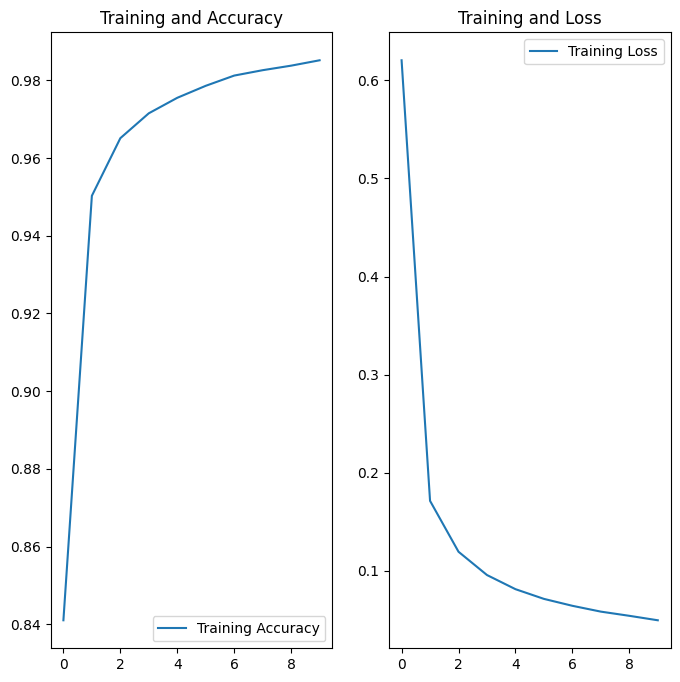

In [199]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Loss')
plt.show()

In [200]:
results = model.evaluate(test_dataset, steps=int(len(test_data) / batch_size))

  1/156 [..............................] - ETA: 54s - loss: 0.0118 - accuracy: 1.0000

2023-12-22 16:32:53.193651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


156/156 [==============================] - 2s 13ms/step - loss: 0.0424 - accuracy: 0.9860


In [201]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.042
accuracy value: 98.5978%
